
## Загрузка данных

In [107]:
import uuid
from scipy import stats

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
# Считываем файл построчно, чтобы избежать ошибок стандартного парсера.
lines = []
with open('DB_3.csv', 'r', encoding='utf-8') as f:
    for line in f:
        # Очищаем каждую строку от лишних кавычек и разделяем по табуляции
        cleaned_line = line.strip().replace('"', '')
        lines.append(cleaned_line.split('\t'))
    
# Используем `lines[1:]`, чтобы пропустить строку заголовка из файла.
df = pd.DataFrame(lines[1:])

# Определяем правильные имена для 15 столбцов.
correct_column_names = [
    'user_id', 'age', 'gender', 'occupation', 'work_mode',
    'screen_time_hours', 'work_screen_hours', 'leisure_screen_hours',
    'sleep_hours', 'sleep_quality_1_5', 'stress_level_0_10',
    'productivity_0_100', 'exercise_minutes_per_week', 'social_hours_per_week',
    'mental_wellness_index_0_100'
]

# Проверяем, что количество имен совпадает с количеством столбцов в данных.
if len(correct_column_names) == df.shape[1]:
    df.columns = correct_column_names
else:
    print(f"Ошибка: Ожидалось {len(correct_column_names)} столбцов, но в данных их {df.shape[1]}.")
    # Можно либо остановить выполнение, либо обрезать/дополнить список имен.
    # Для данного случая, мы знаем, что их должно быть 15.
    df = df.iloc[:, :len(correct_column_names)]
    df.columns = correct_column_names

# Заменяем пустые строки на NaN для корректного преобразования.
df.replace('', np.nan, inplace=True)
df.replace(' ', np.nan, inplace=True)
df.dropna(subset=['user_id'], inplace=True)
df = df.reset_index(drop=True)

# Определяем столбцы, которые должны быть числовыми.
numeric_cols = [
    'age', 'screen_time_hours', 'work_screen_hours', 'leisure_screen_hours',
    'sleep_hours', 'sleep_quality_1_5', 'stress_level_0_10',
    'productivity_0_100', 'exercise_minutes_per_week', 'social_hours_per_week',
    'mental_wellness_index_0_100'
]

# Преобразуем числовые столбцы в соответствующий тип данных.
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Преобразуем категориальные столбцы для экономии памяти.
for col in ['gender', 'occupation', 'work_mode']:
    df[col] = df[col].astype('category')

## Исследование данных


In [109]:
# Отображаем первые 5 строк DataFrame для первичного ознакомления с данными
display(df.head())

# Выводим информацию о DataFrame, включая типы данных и количество непропущенных значений в каждом столбце
display(df.info())

# Генерируем описательную статистику для числовых столбцов
display(df.describe())

,user_id,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100,Unnamed: 15
0,U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1.0,9.3,44.7,127,0.7,9.3,NaN
1,U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3.0,5.7,78.0,74,2.1,56.2,NaN
2,U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1.0,9.1,51.8,67,8.0,3.6,NaN
3,U0004,42,Male,Employed,Hybrid,11.13,0.56,10.57,6.89,1.0,10.0,37.0,0,5.7,0.0,NaN
4,U0005,28,Male,Student,Remote,13.22,4.09,9.13,5.79,1.0,10.0,38.5,143,10.1,0.0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      398 non-null    object 
 1   age                          400 non-null    int64  
 2   gender                       397 non-null    object 
 3   occupation                   399 non-null    object 
 4   work_mode                    398 non-null    object 
 5   screen_time_hours            398 non-null    float64
 6   work_screen_hours            397 non-null    float64
 7   leisure_screen_hours         399 non-null    float64
 8   sleep_hours                  400 non-null    float64
 9   sleep_quality_1_5            398 non-null    float64
 10  stress_level_0_10            399 non-null    float64
 11  productivity_0_100           400 non-null    float64
 12  exercise_minutes_per_week    400 non-null    int64  
 13  social_hours_per_wee

None

,age,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100,Unnamed: 15
count,400.00000,398.000000,397.000000,399.000000,400.000000,398.000000,399.000000,400.000000,400.000000,400.000000,398.000000,0.0
mean,29.77750,9.029171,2.187733,6.837143,7.013175,1.399497,8.145865,54.306500,109.810000,7.905000,20.295729,NaN
std,7.46608,2.483373,1.936002,2.221707,0.852421,0.653377,2.095419,15.020054,70.007045,4.909632,20.336537,NaN
min,16.00000,1.000000,0.110000,0.890000,4.640000,1.000000,0.000000,20.600000,0.000000,0.000000,0.000000,NaN
25%,24.00000,7.385000,0.700000,5.460000,6.397500,1.000000,6.900000,43.600000,58.000000,4.575000,3.725000,NaN
50%,30.00000,9.090000,1.460000,6.700000,7.030000,1.000000,8.800000,51.750000,103.000000,7.750000,14.800000,NaN
75%,35.00000,10.477500,3.020000,8.385000,7.640000,2.000000,10.000000,63.000000,157.000000,11.025000,30.600000,NaN
max,60.00000,19.170000,12.040000,13.350000,9.740000,4.000000,10.000000,100.000000,372.000000,23.900000,97.000000,NaN


In [110]:
# Удаляем столбец 'Unnamed: 15', так как он не содержит полезной информации.
df.drop('Unnamed: 15', axis=1, inplace=True)

In [111]:
df.drop_duplicates('user_id', inplace=True)

df.dropna(subset=['age', 'gender', 'occupation', 'work_mode'], inplace=True)
display(df)

,user_id,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
0,U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1.0,9.3,44.7,127,0.7,9.3
1,U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3.0,5.7,78.0,74,2.1,56.2
2,U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1.0,9.1,51.8,67,8.0,3.6
3,U0004,42,Male,Employed,Hybrid,11.13,0.56,10.57,6.89,1.0,10.0,37.0,0,5.7,0.0
4,U0005,28,Male,Student,Remote,13.22,4.09,9.13,5.79,1.0,10.0,38.5,143,10.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,U0396,26,Female,Student,Remote,6.43,2.99,3.44,7.75,1.0,5.9,64.6,252,7.6,39.3
396,U0397,16,Male,Self-employed,Remote,9.59,5.44,4.15,5.57,1.0,10.0,47.4,99,7.0,3.5
397,U0398,40,Male,Student,Remote,8.72,2.36,6.36,7.56,1.0,9.4,57.3,193,10.1,6.6
398,U0399,29,Female,Retired,Hybrid,5.04,0.94,4.10,7.32,1.0,7.1,63.6,97,12.1,21.0


## Обработка данных


In [112]:
# Для числовых признаков используем медиану.
for col in ['screen_time_hours', 'work_screen_hours', 'leisure_screen_hours', 'sleep_quality_1_5', 'stress_level_0_10', 'mental_wellness_index_0_100']:
    if df[col].isnull().any():
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f"Пропущенные значения в столбце '{col}' заполнены медианой: {median_value}")

df['user_id'] = df['user_id'].apply(lambda x: str(uuid.uuid4()) if pd.isna(x) else x)

# Проверяем наличие пропущенных значений после импутации
display(df.isnull().sum())

Пропущенные значения в столбце 'screen_time_hours' заполнены медианой: 9.05
Пропущенные значения в столбце 'work_screen_hours' заполнены медианой: 1.44
Пропущенные значения в столбце 'leisure_screen_hours' заполнены медианой: 6.7
Пропущенные значения в столбце 'sleep_quality_1_5' заполнены медианой: 1.0
Пропущенные значения в столбце 'stress_level_0_10' заполнены медианой: 8.7
Пропущенные значения в столбце 'mental_wellness_index_0_100' заполнены медианой: 15.5


/tmp/ipython-input-490736503.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


,0
user_id,0
age,0
gender,0
occupation,0
work_mode,0
screen_time_hours,0
work_screen_hours,0
leisure_screen_hours,0
sleep_hours,0
sleep_quality_1_5,0


In [113]:
# Преобразуем категориальные признаки в числовой формат.
# 'gender' - бинарный признак, используем Label Encoding.
# Проводим трансформацию строковых значений в целочисленные, так как алгоритмы МО могут работать только с численными данными.
# 0 – Male, 1 – Female. Данные сохраняются в одном столбце, так как они принадлежат к бинарному типу.
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

# 'occupation' и 'work_mode' - категориальные признаки с несколькими уникальными значениями, используем One-Hot Encoding.
# Создаем новые бинарные столбцы для каждой категории в этих признаках.
df = pd.get_dummies(df, columns=['occupation', 'work_mode'], drop_first=True)

# Проверяем изменения
display(df.head())
display(df.info())

,user_id,age,gender,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100,occupation_Retired,occupation_Self-employed,occupation_Student,occupation_Unemployed,work_mode_In-person,work_mode_Remote
0,U0001,33,1.0,10.79,5.44,5.35,6.63,1.0,9.3,44.7,127,0.7,9.3,False,False,False,False,False,True
1,U0002,28,1.0,7.40,0.37,7.03,8.05,3.0,5.7,78.0,74,2.1,56.2,False,False,False,False,True,False
2,U0003,35,1.0,9.78,1.09,8.69,6.48,1.0,9.1,51.8,67,8.0,3.6,False,False,False,False,False,False
3,U0004,42,0.0,11.13,0.56,10.57,6.89,1.0,10.0,37.0,0,5.7,0.0,False,False,False,False,False,False
4,U0005,28,0.0,13.22,4.09,9.13,5.79,1.0,10.0,38.5,143,10.1,0.0,False,False,True,False,False,True


<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 0 to 399
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      391 non-null    object 
 1   age                          391 non-null    int64  
 2   gender                       383 non-null    float64
 3   screen_time_hours            391 non-null    float64
 4   work_screen_hours            391 non-null    float64
 5   leisure_screen_hours         391 non-null    float64
 6   sleep_hours                  391 non-null    float64
 7   sleep_quality_1_5            391 non-null    float64
 8   stress_level_0_10            391 non-null    float64
 9   productivity_0_100           391 non-null    float64
 10  exercise_minutes_per_week    391 non-null    int64  
 11  social_hours_per_week        391 non-null    float64
 12  mental_wellness_index_0_100  391 non-null    float64
 13  occupation_Retired       

None

## Выбросы


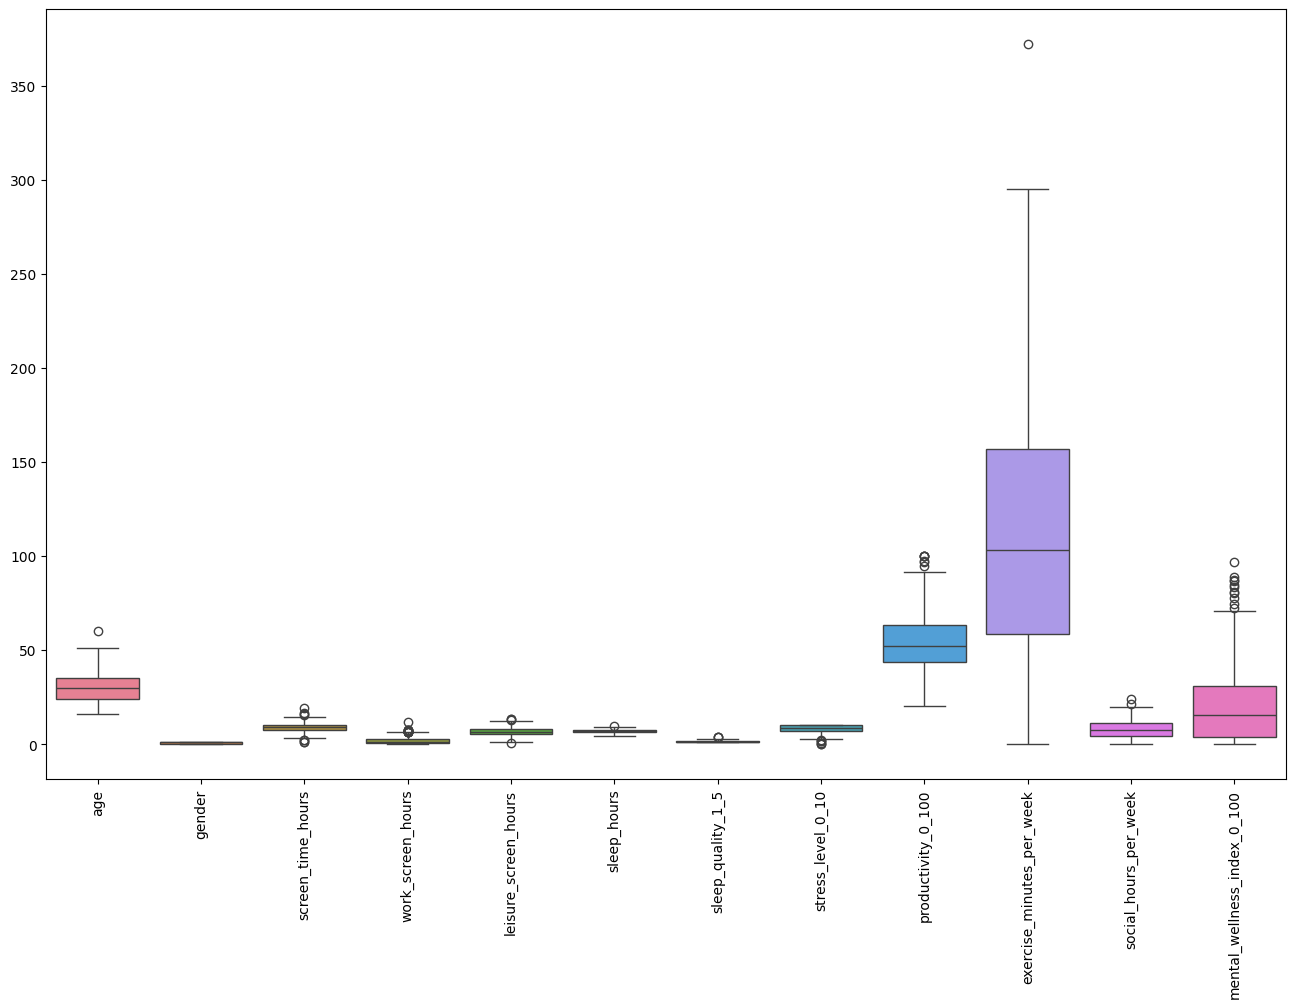

In [114]:
# Визуализация с помощью boxplot
plt.figure(figsize=(16, 10))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=90)
plt.show()

In [115]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Убираем строки, где все числа NaN
df_num = df[numeric_cols].dropna(how="all")

# Z-score только по числовым столбцам
z_scores = np.abs(stats.zscore(df_num, nan_policy='omit'))

# Маска по Z < 3
mask = (z_scores < 3).all(axis=1)
df_clean = df.loc[df_num.index[mask]]

# Проверка, сколько строк осталось
print(f"Строк до очистки: {len(df)}, после: {len(df_clean)}")

Строк до очистки: 391, после: 371


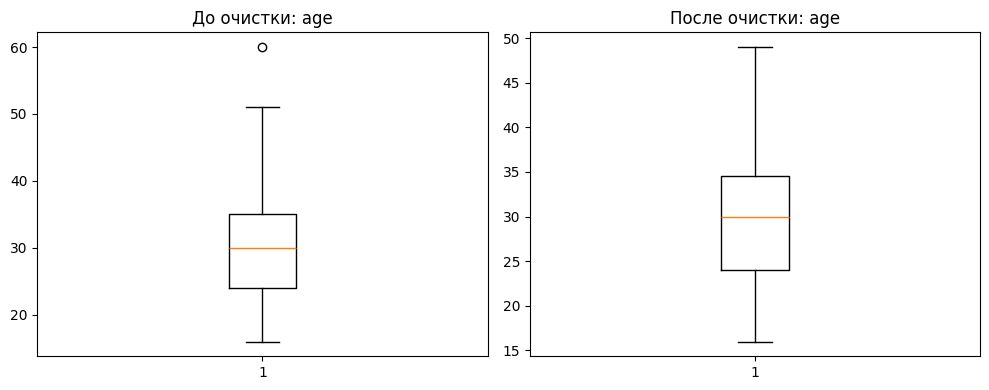

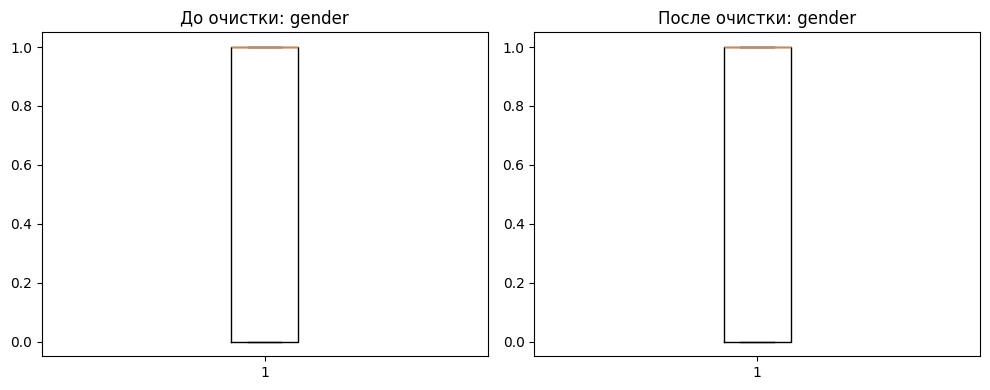

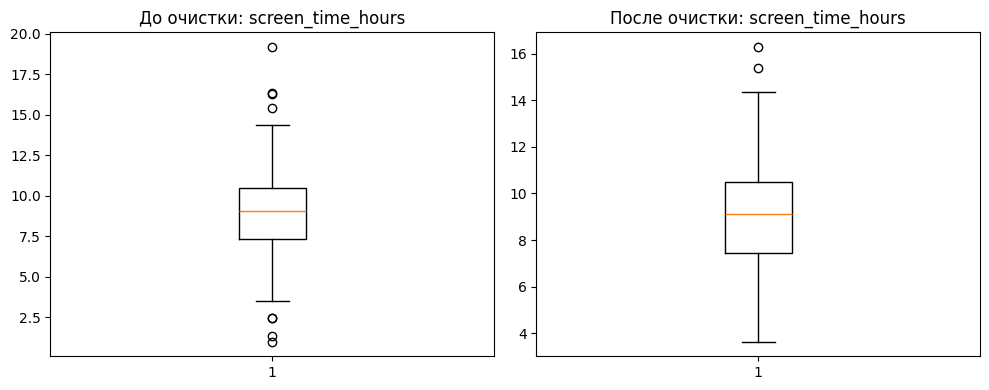

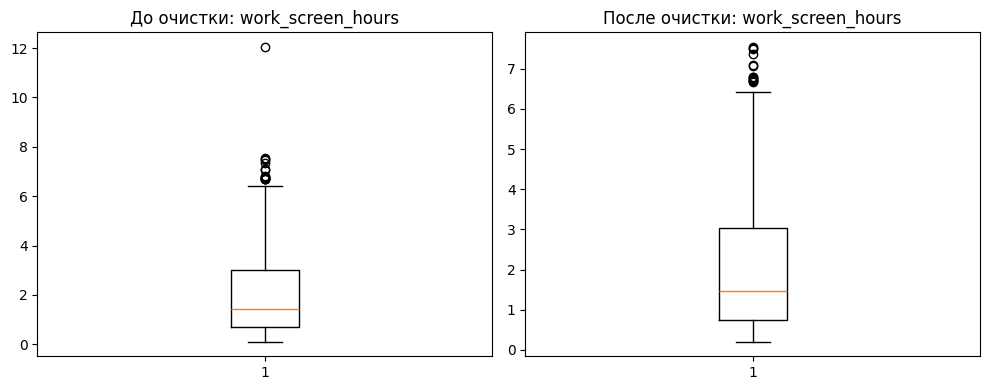

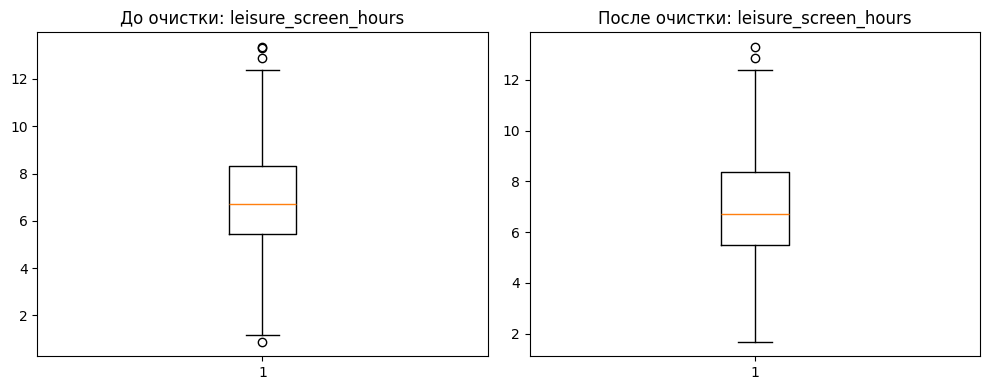

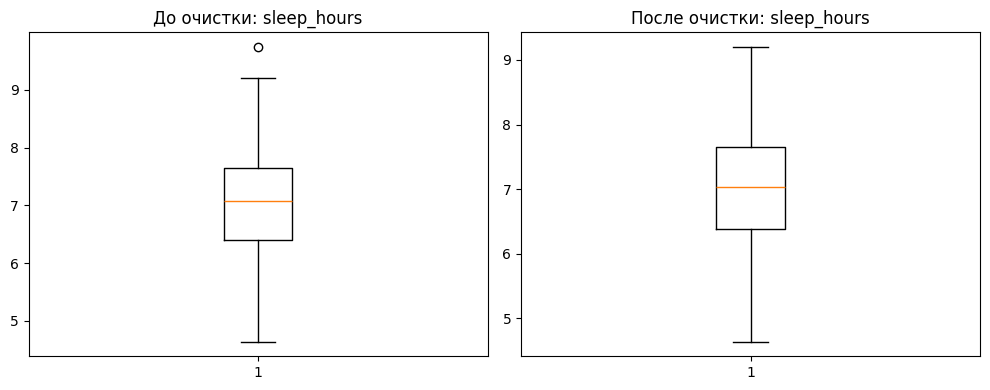

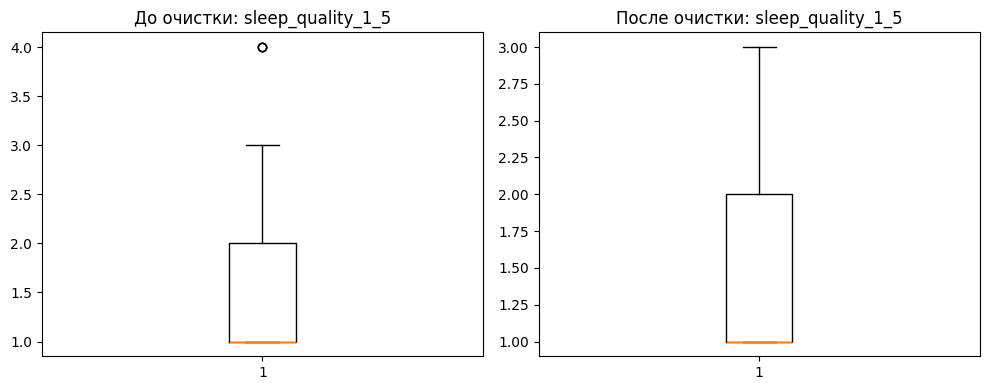

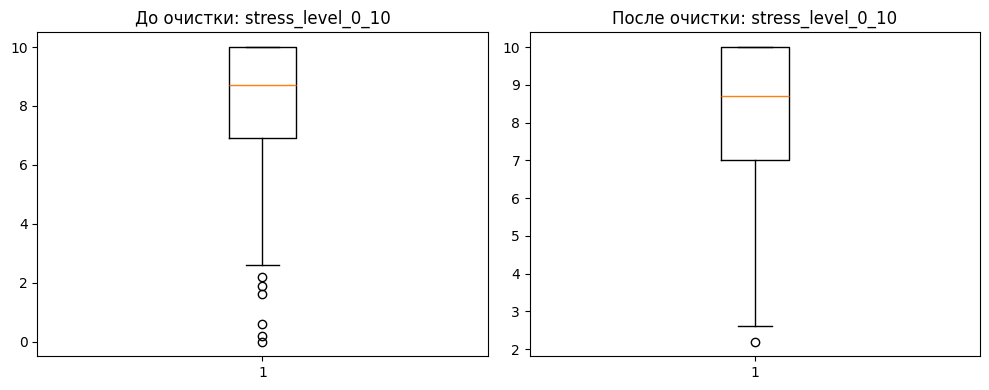

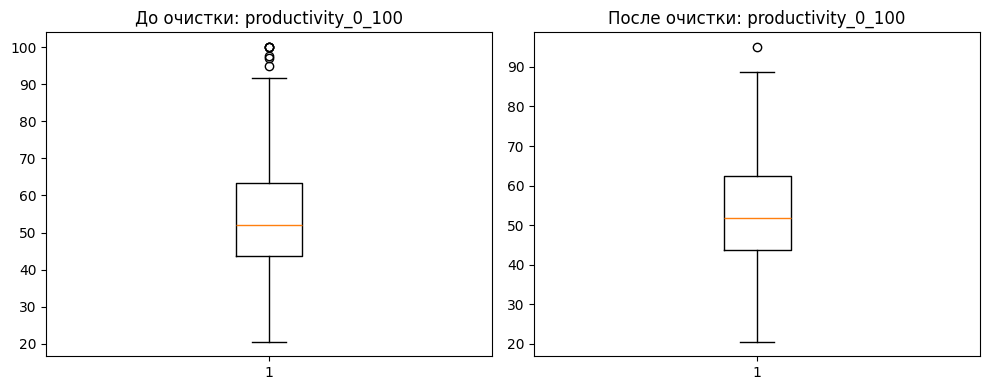

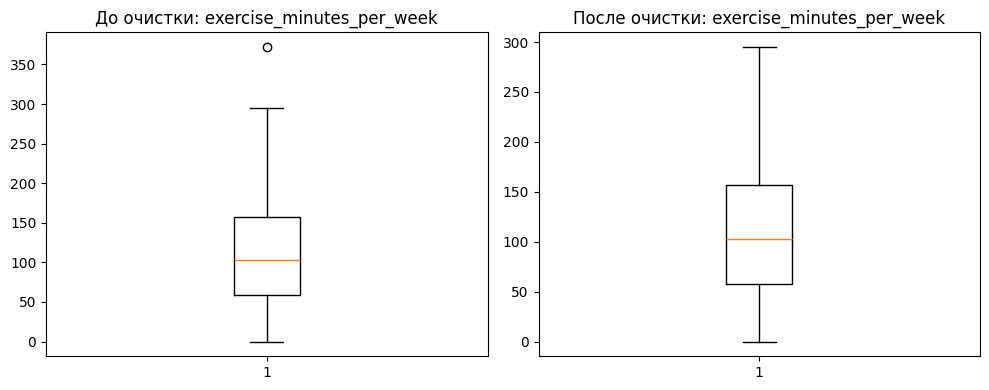

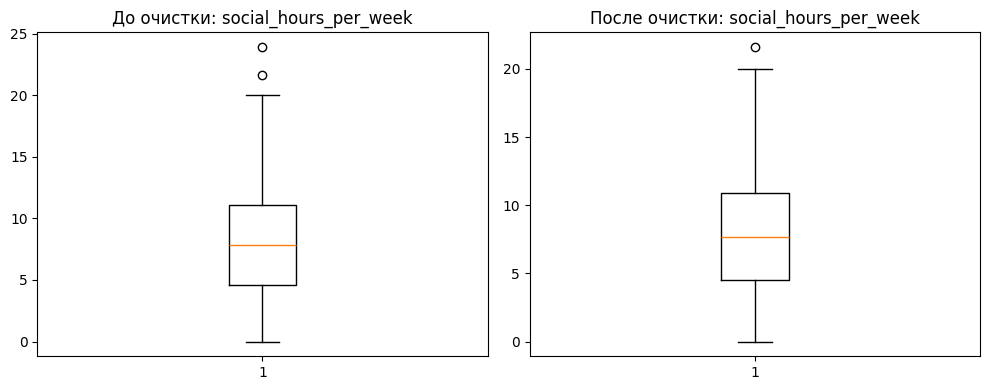

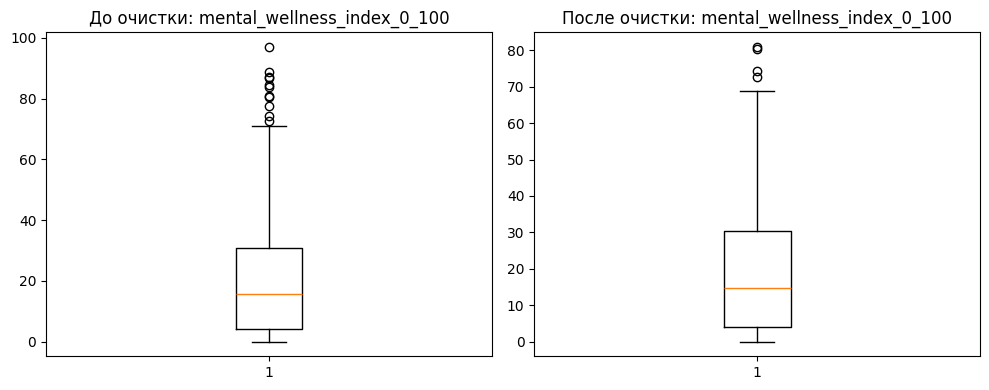

In [116]:
# Визуализируем — до и после очистки
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.boxplot(df[col].dropna())
    plt.title(f"До очистки: {col}")
    plt.subplot(1, 2, 2)
    plt.boxplot(df_clean[col].dropna())
    plt.title(f"После очистки: {col}")
    plt.tight_layout()
    plt.show()
